In [12]:
from numpy import *
import numpy as np
import pandas as pd
import math as Math

In [13]:
rc = 6378137
rj = 6356725
from math import atan, cos, asin, sqrt, pow, pi, sin
def rad(d):
    return d * math.pi / 180.0

def azimuth(pt_a, pt_b):
    lon_a, lat_a = pt_a
    lon_b, lat_b = pt_b
    rlon_a, rlat_a = rad(lon_a), rad(lat_a)
    rlon_b, rlat_b = rad(lon_b), rad(lat_b)
    ec=rj+(rc-rj)*(90.-lat_a)/90.
    ed=ec*cos(rlat_a)

    dx = (rlon_b - rlon_a) * ec
    dy = (rlat_b - rlat_a) * ed
    if dy == 0:
        angle = 90. 
    else:
        angle = atan(abs(dx / dy)) * 180.0 / pi
    dlon = lon_b - lon_a
    dlat = lat_b - lat_a
    if dlon > 0 and dlat <= 0:
        angle = (90. - angle) + 90
    elif dlon <= 0 and dlat < 0:
        angle = angle + 180 
    elif dlon < 0 and dlat >= 0:
        angle = (90. - angle) + 270 
    return angle

import numpy as np
import math as Math
import pandas as pd
from scipy.sparse import csc_matrix
#from CellSense import FingerPrint

rc = 6378137
rj = 6356725

def rad(d):
    return d * Math.pi / 180.0

def distance(true_pt, pred_pt):
    lat1 = float(true_pt[1])
    lng1 = float(true_pt[0])
    lat2 = float(pred_pt[1])
    lng2 = float(pred_pt[0])
    radLat1 = rad(lat1)
    radLat2 = rad(lat2)
    a = radLat1 - radLat2
    b = rad(lng1) - rad(lng2)
    s = 2 * Math.asin(Math.sqrt(Math.pow(Math.sin(a/2),2) +
    Math.cos(radLat1)*Math.cos(radLat2)*Math.pow(Math.sin(b/2),2)))
    s = s * 6378.137
    s = round(s * 10000) / 10
    return s

In [14]:
col_name_new = [
    #'Num_connected',
    'RNCID_1',
    'CellID_1',
    'AsuLevel_1',
    #'SignalLevel_1',
    'RSSI_1',
    'RNCID_2',
    'CellID_2',
    'AsuLevel_2',
    #'SignalLevel_2',
    'RSSI_2',
    'RNCID_3',
    'CellID_3',
    'AsuLevel_3',
    #'SignalLevel_3',
    'RSSI_3',
    'RNCID_4',
    'CellID_4',
    'AsuLevel_4',
    #'SignalLevel_4',
    'RSSI_4',
    'RNCID_5',
    'CellID_5',
    'AsuLevel_5',
    #'SignalLevel_5',
    'RSSI_5',
    'RNCID_6',
    'CellID_6',
    'AsuLevel_6',
    #'SignalLevel_6',
    'RSSI_6',
]


In [15]:
def contextual_feature(o_feature):
    feature=pd.DataFrame(o_feature.sort_values(by="MRTime" , ascending=True))
    feature.reset_index()
    timelist=list(feature['MRTime'])
    switch=[]
    i=0
    while i<len(timelist)-1:
        if (timelist[i+1]-timelist[i])/1000>=1000:
            switch.append(i+1)
        i+=1
    i=0 
    context=[]
    context_1=[]
    context_0=[]
    #print len(timelist)
    while i<len(timelist):
        #print int(feature.iloc[i-1:i,1].values)
        itself='%s%s%s%s%s%s'%(str(int(feature.iloc[i:i+1,1].values)),str(int(feature.iloc[i:i+1,2].values)),str(int(feature.iloc[i:i+1,6].values)),
                           str(int(feature.iloc[i:i+1,7].values)),str(int(feature.iloc[i:i+1,11].values)),str(int(feature.iloc[i:i+1,12].values)))
        context_0.append(float(itself))
        if i==0 or i in switch or i+1==len(timelist):
            context.append(-999)
            context_1.append(-999)
            #print i
            #print context[i]
        else:
            temp='%s%s%s%s%s%s'%(str(int(feature.iloc[i-1:i,1].values)),str(int(feature.iloc[i-1:i,2].values)),str(int(feature.iloc[i-1:i,6].values)),
                           str(int(feature.iloc[i-1:i,7].values)),str(int(feature.iloc[i-1:i,11].values)),str(int(feature.iloc[i-1:i,12].values)))
            #print i+1
            temp1='%s%s%s%s%s%s'%(str(int(feature.iloc[i+1:i+2,1].values)),str(int(feature.iloc[i+1:i+2,2].values)),str(int(feature.iloc[i+1:i+2,6].values)),
                           str(int(feature.iloc[i+1:i+2,7].values)),str(int(feature.iloc[i+1:i+2,11].values)),str(int(feature.iloc[i+1:i+2,12].values)))
            #temp=feature[i-1:i,1]+'-'+feature[i-1:i,2]+'-'+feature[i-1:i,6]+feature[i-1:i,7]
            #print temp
            context.append(float(temp))
            #print str(int(feature.iloc[i+1:i+2,6].values))
            context_1.append(float(temp1))
        i+=1
    feature['context']=context
    feature['context_0']=context_0
    feature['context_l']=context_1
    return feature


In [16]:
def merge_2g_engpara():
    eng_para = pd.read_csv('Trajectory data/2G_gongcan.csv', encoding='gbk')
    eng_para = eng_para[['RNCID', 'CellID', 'Lon','Lat']]
    #eng_para = eng_para[eng_para.LAC.notnull() & eng_para[u'经度'].notnull()]
    eng_para = eng_para.drop_duplicates()
    #eng_para.rename(columns={u'经度': 'lon', u'纬度': 'lat'}, inplace=True)
    return eng_para

def make_rf_dataset(data, eng_para, is_c=True):
    # default_value = -999.
    # data = pd.merge(left=data,right=eng_para,left_on=['RNCID_1','CellID_1'],right_on=['LAC','CI'],how='left')
    #data=pd.DataFrame(data.sort_values(by="MRTime", ascending=True))
    for i in range(1, 8):
        #data=pd.DataFrame(data.sort_values(by="MRTime", ascending=True))
        data['MRTime_%d'% i]=data['MRTime']
        data = data.merge(eng_para, left_on=['RNCID_%d' % i, 'CellID_%d' % i], right_on=['RNCID','CellID'], how='left', suffixes=('', '%d' % i))
        #data['RSSI_%d'%i] = data['RSCP_%d'%i]-data['EcNo_%d'%i]
        # data = data.drop(['LAC', 'CI'], axis=1)
        m=0
        temp=data['CellID_%d'% i].tolist()
        new=list()
        for item in temp:
            if math.isnan(item):
                new.append(0)
            elif int(item)<=0:
                new.append(0)
            else:
                new.append(item)
        data['CellID_%d' % i]=item
    data = data.fillna(-999.)
    #print data.columns
    if is_c:
        data=contextual_feature(data)
        feature = data[col_name_new+['context_0','context','context_l','MRTime','Lon','Lat','Lon2','Lat2','Lon3','Lat3','Lon4','Lat4',
                                'Lon5','Lat5','Lon6','Lat6']]
    else:
        #feature = data[col_name_new+['Lon','Lat','Lon2','Lat2','Lon3','Lat3','Lon4','Lat4',
                                #'Lon5','Lat5','Lon6','Lat6']] #6*6 可以变换排列顺序
        feature = data[['MRTime_1','Lon','Lat','RSSI_1','RNCID_1','CellID_1','AsuLevel_1','MRTime_2','Lon2','Lat2','RSSI_2','RNCID_2','CellID_2','AsuLevel_2',
                        'MRTime_3','Lon3','Lat3','RSSI_3','RNCID_3','CellID_3','AsuLevel_3','MRTime_4','Lon4','Lat4','RSSI_4','RNCID_4','CellID_4','AsuLevel_4',
                        'MRTime_5','Lon5','Lat5','RSSI_5','RNCID_5','CellID_5','AsuLevel_5',
                        'MRTime_6','Lon6','Lat6','RSSI_6','RNCID_6','CellID_6','AsuLevel_6',
                        'MRTime_7','Lon7','Lat7','RSSI_7','RNCID_7','CellID_7','AsuLevel_7']] 
        
    label = data[['Longitude', 'Latitude']]
    '''labe_x=data['Longitude']-feature['lon']
    labe_y=data['Latitude']-feature['lat']
    labe=pd.DataFrame()
    labe['Longitude']=labe_x
    labe['Latitude']=labe_y
    label=labe[['Longitude', 'Latitude']].values'''

    return data['MRTime'], feature, label

#eng_para = merge_2g_engpara()
eng_para =merge_2g_engpara()

In [42]:
data_2g=pd.read_csv("Trajectory data/data_2g.csv")
tr_label_ = data_2g[['Longitude', 'Latitude']].values
from sklearn.cross_validation import train_test_split
tr_feature_r, te_feature_r, tr_label_, te_label_ = train_test_split(data_2g, tr_label_, test_size=0.2,random_state=30)

In [43]:
#tr_time, tr_feature, tr_label = make_rf_dataset(tr_feature_r, eng_para)
#te_time, te_feature, te_label = make_rf_dataset(te_feature_r, eng_para)
tr_time1, tr_feature1, tr_label_1 = make_rf_dataset(tr_feature_r, eng_para, is_c=False)
te_time1, te_feature1, te_label_1 = make_rf_dataset(te_feature_r, eng_para, is_c=False)


/home/zhangyige/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [44]:
import importlib
import grid
#from grid import RoadGrid
#importlib.reload(grid)
#from grid import RoadGrid
rg = grid.RoadGrid(np.vstack((tr_label_1.values,te_label_1.values)),50)
tr_label_ = rg.transform(tr_label_1.values, False)
#rint tr_label_
te_label_ = rg.transform(te_label_1.values, False)
#print (rg.n_grid)
print (len(set(tr_label_)))
print (len(set(te_label_)))

288
246


In [45]:
print tr_feature1.shape

(4876, 49)


In [46]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
scaler = MinMaxScaler()
#ss_x = preprocessing.StandardScaler()  
#tr_feature1 = ss_x.fit_transform(tr_feature1)  
#te_feature1 = ss_x.transform(te_feature1)  
#X_data = scaler.fit_transform(X_data)
tr_feature1 = preprocessing.scale(tr_feature1)
te_feature1 = preprocessing.scale(te_feature1)
X = tr_feature1.reshape(-1,7,7,1) # reset size 
X_te=te_feature1.reshape(-1,7,7,1)# reset size 

#r_label_=pd.DataFrame(tr_label_)
#te_label_=pd.DataFrame(te_label_)
#print te_label_1[0:10]
ss_y = preprocessing.StandardScaler()  
Y = ss_y.fit_transform(tr_label_1)  
Y_te=ss_y.transform(te_label_1)  
#Y=tr_label_1
#Y_te=te_label_1
print Y_te
Y_r=ss_y.inverse_transform(Y_te)
print Y_r
num_c=118 #set number of classes in labels
#from sklearn.preprocessing import OneHotEncoder
#from keras.utils.np_utils import to_categorical
#Y = to_categorical(tr_label_, num_classes=None)
#Y_te = to_categorical(te_label_, num_classes=None)
#Y = OneHotEncoder().fit_transform(tr_label_).todense()
#Y_te=OneHotEncoder().fit_transform(te_label_).todense()
#print pd.DataFrame(Y)
#print pd.DataFrame(Y_te)

batch_size = 20
def generatebatch(X,Y,n_examples, batch_size):
    for batch_i in range(n_examples // batch_size):
        start = batch_i*batch_size
        end = start + batch_size
        batch_xs = X[start:end]
        batch_ys = Y[start:end]
        yield batch_xs, batch_ys # 生成每一个batch

[[-0.00494674  0.25202961]
 [-1.50785173  1.70001998]
 [-1.51160062 -0.55479963]
 ...
 [-1.30440996 -0.67617081]
 [-1.6983584   0.93724993]
 [ 0.53858535  0.49696875]]
[[121.2110526   31.28843411]
 [121.2058009   31.29300197]
 [121.2057878   31.28588887]
 ...
 [121.2065118   31.28550599]
 [121.2051352   31.29059572]
 [121.2129519   31.2892068 ]]


In [47]:
 def variable_with_weight_loss(shape, stddev, wl):
        '''
        使用tf.truncated_normal截断的正态分布来初始化权重,这里给weight加一个L2的loss.
        我们使用wl控制L2 loss的大小,使用tf.nn.l2_loss计算weight的L2 loss.
        再使用tf.multiply让L2 loss乘wl,得到最后的weight loss,最后将weight loss添加到一个collection.便于后期优化
        :param shape:
        :param stddev:
        :param wl:
        :return:
        '''
        var = tf.Variable(tf.truncated_normal(shape, stddev=stddev))
        if wl is not None:
            weight_loss = tf.multiply(tf.nn.l2_loss(var), wl, name='weight_loss')
            tf.add_to_collection('losses',weight_loss)
        return var

In [48]:
tf.reset_default_graph()
# 输入层
tf_X = tf.placeholder(tf.float32,[None,7,7,1]) # reset size 
tf_Y = tf.placeholder(tf.float32,[None,2])

# 卷积层+激活层
#conv_filter_w1 = tf.Variable(tf.random_normal([7, 7, 1, num_c]))
conv_filter_w1 = variable_with_weight_loss(shape=[7, 7, 1, num_c], stddev=5e-2, wl=0.00)
conv_filter_b1 =  tf.Variable(tf.random_normal([num_c]))
relu_feature_maps1 = tf.nn.relu(tf.nn.conv2d(tf_X, conv_filter_w1,strides=[1, 1, 1, 1], padding='SAME') + conv_filter_b1)
# 池化层
#max_pool1 = tf.nn.max_pool(relu_feature_maps1,ksize=[1,3,3,1],strides=[1,2,2,1],padding='SAME')
print (relu_feature_maps1)

# 卷积层
#conv_filter_w2 = tf.Variable(tf.random_normal([7, 7, num_c, 5]))
conv_filter_w2= variable_with_weight_loss(shape=[7,7,num_c,5], stddev=5e-2, wl=0.00)
conv_filter_b2 =  tf.Variable(tf.random_normal([5]))
conv_out2 = tf.nn.conv2d(relu_feature_maps1, conv_filter_w2,strides=[1, 2, 2, 1], padding='SAME') + conv_filter_b2 #pooling step 2,1
print (conv_out2)
# BN归一化层+激活层 
batch_mean, batch_var = tf.nn.moments(conv_out2, [0, 1, 2], keep_dims=True)
shift = tf.Variable(tf.zeros([5]))
scale = tf.Variable(tf.ones([5]))
epsilon = 1e-3
BN_out = tf.nn.batch_normalization(conv_out2, batch_mean, batch_var, shift, scale, epsilon)
print (BN_out)
relu_BN_maps2 = tf.nn.relu(BN_out)
# 池化层
#max_pool2 = tf.nn.max_pool(relu_BN_maps2,ksize=[1,3,3,1],strides=[1,2,2,1],padding='SAME') # 1331 1221
#print (max_pool2)

# 将特征图进行展开
#max_pool2_flat = tf.reshape(max_pool2, [-1, 2*2*5])
relu_BN_maps2_flat = tf.reshape(relu_BN_maps2, [-1, 4*4*5])
dim = relu_BN_maps2_flat.get_shape()[1].value
# 全连接层
fc_w1 = variable_with_weight_loss(shape=[dim,64], stddev=0.04, wl=0.004)
#fc_w1 = tf.Variable(tf.random_normal([4*4*5,64]))
fc_b1 =  tf.Variable(tf.random_normal([64]))
#fc_out1 = tf.nn.relu(tf.matmul(max_pool2_flat, fc_w1) + fc_b1) #max_pool2_flat
fc_out1 = tf.nn.relu(tf.matmul(relu_BN_maps2_flat, fc_w1) + fc_b1)
# 输出层
out_w1 = tf.Variable(tf.random_normal([64,2]))
out_b1 = tf.Variable(tf.random_normal([2]))
pred = tf.matmul(fc_out1,out_w1)+out_b1

Tensor("Relu:0", shape=(?, 7, 7, 118), dtype=float32)
Tensor("add_1:0", shape=(?, 4, 4, 5), dtype=float32)
Tensor("batchnorm/add_1:0", shape=(?, 4, 4, 5), dtype=float32)


In [60]:
#loss = -tf.reduce_mean(tf_Y*tf.log(tf.clip_by_value(pred,1e-11,1.0)))
#losses = tf.reduce_mean(tf.square(tf_Y - pred))
loss = tf.reduce_mean(tf.reduce_sum(tf.square(tf_Y - pred)))
tf.add_to_collection('losses',loss)
losses=tf.add_n(tf.get_collection('losses'), name='total_loss')
#loss=tf.nn.softmax_cross_entropy_with_logits(labels=tf_Y, logits=pred)

train_step = tf.train.AdamOptimizer(1e-3).minimize(losses)

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(1000): # 迭代1000个周期
        for batch_xs,batch_ys in generatebatch(X,Y,Y.shape[0],batch_size): # 每个周期进行MBGD算法
            sess.run(train_step,feed_dict={tf_X:batch_xs,tf_Y:batch_ys})
        if(epoch%50==0):
            #res = sess.run(accuracy,feed_dict={tf_X:X,tf_Y:Y})
            lo=sess.run(losses,feed_dict={tf_X:X,tf_Y:Y})
            #w=sess.run(loss,feed_dict={tf_X:X,tf_Y:Y})
            print epoch,lo
    pred_tr = sess.run(pred, feed_dict={tf_X:X,tf_Y:Y}) 
    pred_te = sess.run(pred, feed_dict={tf_X:X_te,tf_Y:Y_te}) 
    loss_e =sess.run(losses,feed_dict={tf_X:X_te,tf_Y:Y_te})
    #res_ypred = y_pred.eval(feed_dict={tf_X:X,tf_Y:Y}).flatten() # 只能预测一批样本，不能预测一个样本
    #print (res_ypred)
    #te_ypred = y_pred.eval(feed_dict={tf_X:X_te,tf_Y:Y_te}).flatten() # 只能预测一批样本，不能预测一个样本
    print (pred_te)
    print loss_e

0 9253.465


In [52]:
print pred_te

[[ 0.43468618  0.8476975 ]
 [-1.607626    1.7613044 ]
 [-1.6704279  -0.48555693]
 ...
 [-1.4594789  -0.5974542 ]
 [-1.6860996   1.0027876 ]
 [ 0.8248447   0.61505497]]


# 转换成正常的坐标（tr：训练，te:测试）

In [53]:
pred_tr1=ss_y.inverse_transform(pred_tr)
pred_te1=ss_y.inverse_transform(pred_te)

In [54]:
print pred_te1

[[121.212585  31.290314]
 [121.20545   31.293196]
 [121.20523   31.286108]
 ...
 [121.20597   31.285755]
 [121.20518   31.290802]
 [121.21395   31.28958 ]]


In [55]:
te_label_1

,Longitude,Latitude
0,121.211053,31.288434
1,121.205801,31.293002
2,121.205788,31.285889
3,121.215062,31.286236
4,121.211638,31.289491
5,121.212051,31.289150
6,121.213270,31.287481
7,121.214966,31.281955
8,121.209627,31.285821
9,121.214687,31.289348


In [56]:
#tr_pred_ = np.array([rg.grid_center[idx] for idx in res_ypred])
error_new = [distance(pt1, pt2) for pt1, pt2 in zip(pred_tr1, tr_label_1.values)]
print np.median(error_new)
#te_pred_ = np.array([rg.grid_center[idx] for idx in te_ypred])
error_new1 = [distance(pt1, pt2) for pt1, pt2 in zip(pred_te1, te_label_1.values)]
print np.median(error_new1)

47.95
75.45


<type 'list'>


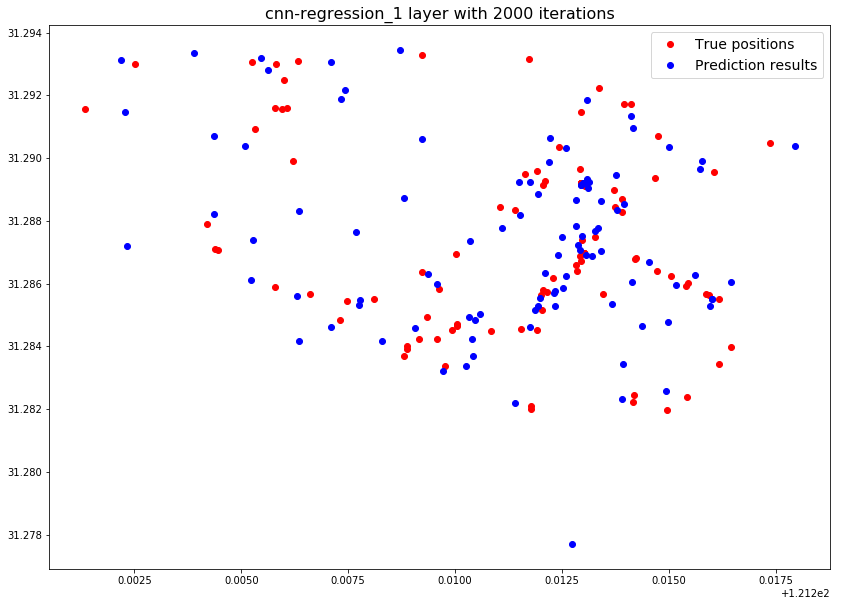

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,10))
print type(te_label_)
plt.plot(te_label_1.values[0:100,0],te_label_1.values[0:100,1], 'ro', label='True positions')
plt.plot(pred_te1[0:100,0],pred_te1[0:100,1], 'bo', label='Prediction results')
plt.legend(fontsize=14)
plt.title("cnn-regression_1 layer with 2000 iterations",fontsize=16)
plt.show()